<a href="https://colab.research.google.com/github/number000000/CSE151A-MachineLearning-TeamProject/blob/main/Model1(ANN/DNN)%5BMilestone3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [ ]:
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

In [ ]:
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

In [ ]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 208.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   3810 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [ ]:
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
X.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

In [ ]:
y['Class'].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.67593733, 0.87923163, 0.90121587, ..., 0.88801055, 0.69391702,
        0.20757716],
       [0.62533005, 0.71409491, 0.64808716, ..., 0.69197987, 0.64600914,
        0.32456423],
       [0.62339377, 0.75006612, 0.73434911, ..., 0.78984635, 0.63563643,
        0.53857594],
       ...,
       [0.43002992, 0.44045819, 0.40864083, ..., 0.60847407, 0.43266526,
        0.35564534],
       [0.20515754, 0.17532451, 0.16992207, ..., 0.56901705, 0.20868495,
        0.44453926],
       [0.34175321, 0.24088172, 0.16869838, ..., 0.28376388, 0.34001406,
        0.84022485]])

In [ ]:
label_encoder = LabelEncoder()
y['Class'] = label_encoder.fit_transform(y['Class'])

<ipython-input-10-d20a001ba4a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = label_encoder.fit_transform(y['Class'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential() # Initialising the ANN/DNN
model.add(Dense(units = 64, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics=[
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  'accuracy'
                  ])


In [ ]:
history = model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10, validation_split=0.2, verbose = 0)

In [ ]:
yhat_test1 = model.predict(X_test.astype(float))
yhat_test1 = [ 1 if y>=0.5 else 0 for y in yhat_test1 ]
print(classification_report(y_test,yhat_test1))

test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

# Extracting training and validation loss and accuracies
training_loss = history.history['loss'][0]
validation_loss = history.history['val_loss'][0]
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

print(f"training_loss: {training_loss}")
print(f"validation_loss: {validation_loss}")
print(f"training_accuracy: {training_accuracy}")
print(f"validation_accuracy: {validation_accuracy}")

24/24 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       350
           1       0.95      0.90      0.93       412

    accuracy                           0.92       762
   macro avg       0.92      0.93      0.92       762
weighted avg       0.93      0.92      0.92       762

24/24 [==============================] - 0s 2ms/step - loss: 0.1923 - precision: 0.9538 - recall: 0.9029 - accuracy: 0.9239
Test loss: [0.19226959347724915, 0.9538461565971375, 0.9029126167297363, 0.9238845109939575]
training_loss: 0.36448246240615845
validation_loss: 0.20769146084785461
training_accuracy: [0.8679245114326477, 0.9138638377189636, 0.9237079620361328, 0.9237079620361328, 0.9228876233100891, 0.9228876233100891, 0.9200164079666138, 0.920426607131958, 0.9200164079666138, 0.9245283007621765]
validation_accuracy: [0.9196721315383911, 0.9213114976882935, 0.911475419998169, 0.9245901703834534, 0.924590170

## Where does your model fit in the fitting graph.
Accuracy, Precision, Recall, and F1-score are consistently high on the test dataset (around 93%), indicating that the model performs well on unseen data.

Loss metrics show that the validation loss (with values ranging from about 0.20 to 0.24) is reasonably close to the training loss (which decreases to about 0.23 by the end of training), and the test loss is also low (0.1883).

We can see the training, validating, and testing metrics perform good and similar to each other which show that our model is just right. No overfitting or underfitting happen.

## What are the next 2 models you are thinking of and why?
1. SVM: SVM is a good model for classication, and we are trying to classify rice base on features, which is appropriate.
2. Naive Bayes: Naive Bayes is a good model for classication task, and we are trying to classify rice base on features, which is appropriate.

## Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

The model currently perform well, with above 90% accuracy on testing data. However, there still some room to improve. We can tune our hyperparameter to try to achieve better metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.9304461942257218
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       350
           1       0.94      0.93      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

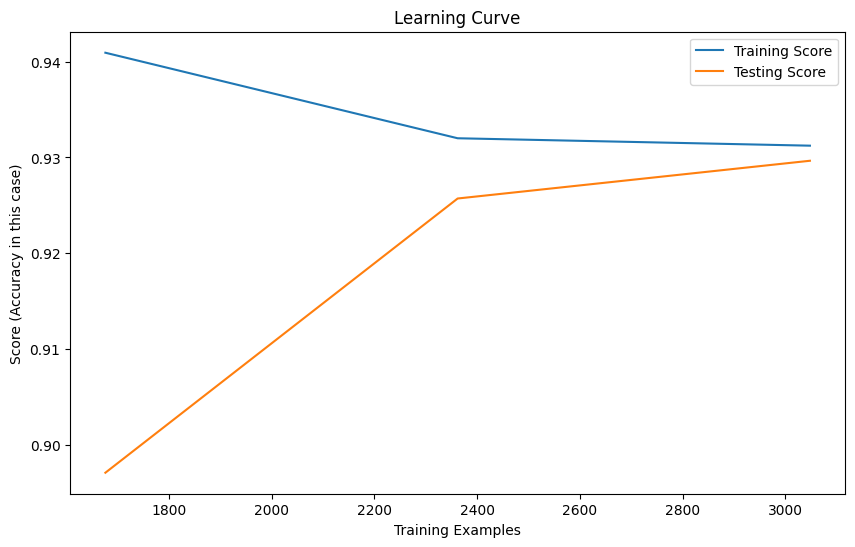

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score (Accuracy in this case)')
plt.legend()
plt.show()